# 7 ways to label a cluster plot

This notebook includes 7 ways to label a scatter plot with different groups, or clusters. It is also a blog post: www.nikkimarinsek.com/blog/7-ways-to-label-a-cluster-plot-python.

### Import libraries and format plots

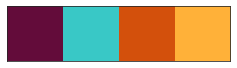

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)

### Create labeled groups of data

In [4]:
np.random.normal([3,4], [0.5, 0.5], [n,2])

array([[3.71259199, 4.11924271],
       [2.9703607 , 3.939574  ],
       [3.02259171, 4.31850754],
       [2.75862036, 3.864294  ],
       [2.388235  , 3.71020865],
       [2.67432574, 3.8730909 ],
       [2.92393536, 4.0008474 ],
       [2.280197  , 3.94951481],
       [2.60517966, 3.88072942],
       [2.85862457, 4.15334563],
       [3.43321476, 4.34333244],
       [3.81165903, 4.57082549],
       [2.20785029, 5.19043427],
       [1.67292263, 3.81168689],
       [3.02873823, 3.98661099],
       [2.57147731, 4.71383196],
       [3.14740426, 4.0822687 ],
       [4.06483246, 2.84981348],
       [2.52755857, 3.53313181],
       [3.72050455, 3.98369762],
       [2.82310308, 4.02889903],
       [3.20654994, 3.76201633],
       [2.40324593, 4.60176382],
       [3.37353199, 4.63101005],
       [3.49019632, 3.59105151],
       [3.61695427, 3.27478204],
       [2.87183647, 3.61488508],
       [3.20574686, 3.43130734],
       [3.53688385, 4.15372781],
       [2.74277236, 3.43754098],
       [3.

In [2]:
#number of points per group
n = 50

#define group labels and their centers
groups = {'A': (2,2),
          'B': (3,4),
          'C': (4,4),
          'D': (4,1)}

#create labeled x and y data
data = pd.DataFrame(index=range(n*len(groups)), columns=['x','y','label'])
for i, group in enumerate(groups.keys()):
    #randomly select n datapoints from a gaussian distrbution
    data.loc[i*n:((i+1)*n)-1,['x','y']] = np.random.normal(groups[group], 
                                                           [0.5,0.5], 
                                                           [n,2])
    #add group labels
    data.loc[i*n:((i+1)*n)-1,['label']] = group

data.head()

,x,y,label
0,1.20886,3.11631,A
1,2.26474,2.52013,A
2,2.30309,2.47762,A
3,0.981847,1.77919,A
4,1.68684,2.11198,A


### Style 1: Standard legend

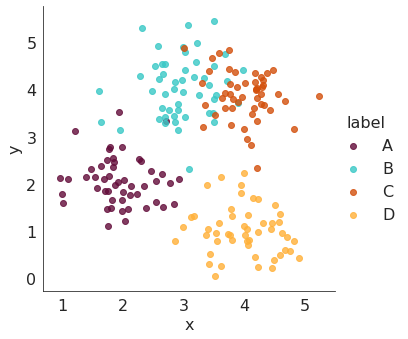

In [5]:
#plot data with seaborn
facet = sns.lmplot(data=data, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

### Style 2: Color-coded legend

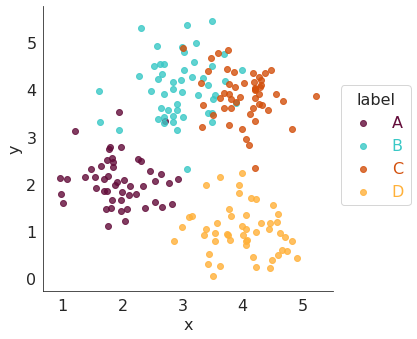

In [6]:
#plot data with seaborn (don't add a legend yet)
facet = sns.lmplot(data=data, x='x', y='y', hue='label', 
                   fit_reg=False, legend=False)

#add a legend
leg = facet.ax.legend(bbox_to_anchor=[1, 0.75],
                         title="label", fancybox=True)
#change colors of labels
for i, text in enumerate(leg.get_texts()):
    plt.setp(text, color = customPalette[i])
    

### Style 3: Color-coded title

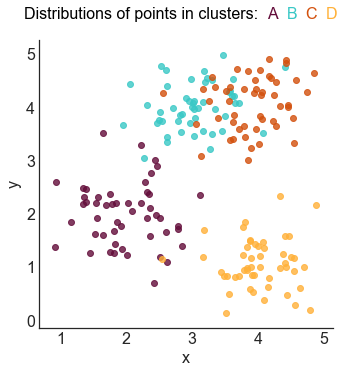

In [12]:
#plot data with seaborn
facet = sns.lmplot(data=data, x='x', y='y', hue='label', 
                   fit_reg=False, legend=False)

#define padding -- higher numbers will move title rightward
pad = 4

#define separation between cluster labels
sep = 0.3

#define y position of title
y = 5.6

#add beginning of title in black
facet.ax.text(pad, y, 'Distributions of points in clusters:', 
              ha='right', va='bottom', color='black')

#add color-coded cluster labels
for i, label in enumerate(groups.keys()):
    text = facet.ax.text(pad+((i+1)*sep), y, label, 
                         ha='right', va='bottom',
                         color=customPalette[i])


### Style 4: Labels next to clusters

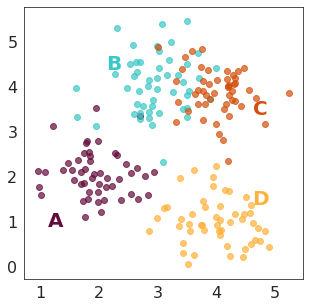

In [7]:
#define labels and where they should go
labels = {'A': (1.25,1),
          'B': (2.25,4.5),
          'C': (4.75,3.5),
          'D': (4.75,1.5)}

#create a new figure
plt.figure(figsize=(5,5))

#loop through labels and plot each cluster
for i, label in enumerate(groups.keys()):

    #add data points 
    plt.scatter(x=data.loc[data['label']==label, 'x'], 
                y=data.loc[data['label']==label,'y'], 
                color=customPalette[i], 
                alpha=0.7)
    
    #add label
    plt.annotate(label, 
                 labels[label],
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color=customPalette[i]) 


### Style 5: Labels centered on cluster means

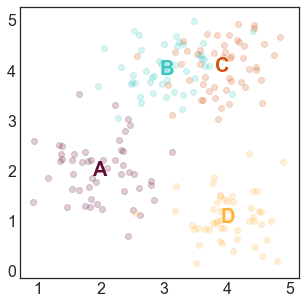

In [9]:
#create a new figure
plt.figure(figsize=(5,5))

#loop through labels and plot each cluster
for i, label in enumerate(groups.keys()):

    #add data points 
    plt.scatter(x=data.loc[data['label']==label, 'x'], 
                y=data.loc[data['label']==label,'y'], 
                color=customPalette[i], 
                alpha=0.20)
    
    #add label
    plt.annotate(label, 
                 data.loc[data['label']==label,['x','y']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color=customPalette[i]) 

### Style 6: Labels centered on cluster means

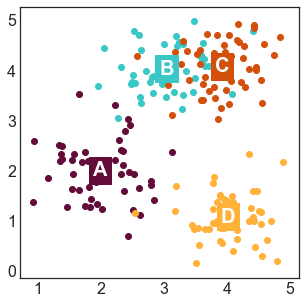

In [10]:
#create a new figure
plt.figure(figsize=(5,5))

#loop through labels and plot each cluster
for i, label in enumerate(groups.keys()):

    #add data points 
    plt.scatter(x=data.loc[data['label']==label, 'x'], 
                y=data.loc[data['label']==label,'y'], 
                color=customPalette[i], 
                alpha=1)
    
    #add label
    plt.annotate(label, 
                 data.loc[data['label']==label,['x','y']].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=20, weight='bold',
                 color='white',
                 backgroundcolor=customPalette[i]) 

### Style 7: Text markers

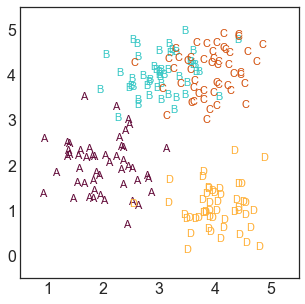

In [11]:
#create a new figure and set the x and y limits
fig, axes = plt.subplots(figsize=(5,5))
axes.set_xlim(0.5,5.5)
axes.set_ylim(-0.5,5.5)

#loop through labels and plot each cluster
for i, label in enumerate(groups.keys()):

    #loop through data points and plot each point 
    for l, row in data.loc[data['label']==label,:].iterrows():
    
        #add the data point as text
        plt.annotate(row['label'], 
                     (row['x'], row['y']),
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=11,
                     color=customPalette[i]) 